## Displaying a Well Plot with Matplotlib

### Loading Well Data from CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
well = pd.read_csv("C:\Users\valpr\Downloads\Welldata\WellData.csv", header=0)

In [4]:
well.replace(-999.25, np.nan, inplace=True)
well.replace(-999.00, np.nan, inplace=True)


In [5]:
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,1921.000000,1921.000000,1918.000000,1921.000000,1921.000000,1921.000000
mean,4705.800425,67.543849,67.398183,2.554064,0.020477,0.114056
std,55.468658,31.455753,4.525434,0.121438,0.045450,0.039322
min,4609.800800,19.605911,54.929482,1.947107,-0.132031,0.033476
25%,4657.800600,38.902794,64.324596,2.495097,-0.012742,0.092152
50%,4705.800400,63.487732,67.392708,2.557842,0.006896,0.111190
75%,4753.800200,95.923019,70.078076,2.647077,0.054896,0.128894
max,4801.800000,137.462921,89.620895,2.788836,0.134148,0.417384


### Setting up the logplot

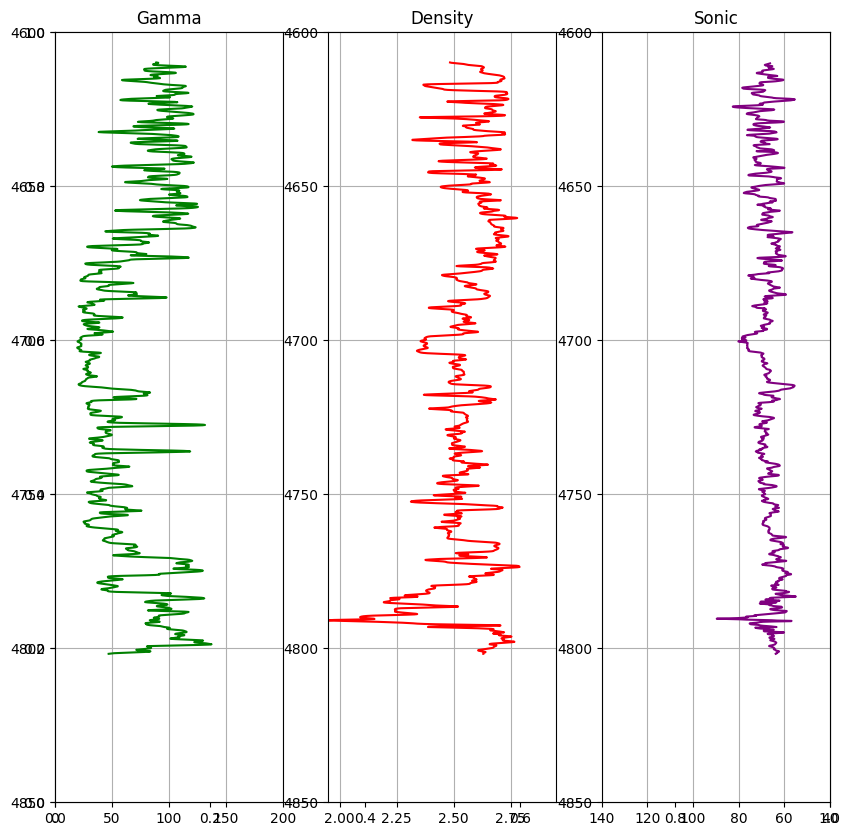

In [6]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = well, color = "green") # Call the data from the well dataframe
ax1.set_title("Gamma") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(4850, 4600) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(4850, 4600)
ax2.grid()

ax3.plot("DT", "DEPTH", data = well, color = "purple")
ax3.set_title("Sonic")
ax3.set_xlim(140, 40)
ax3.set_ylim(4850, 4600)
ax3.grid()


#### Customising the Log Plot
We can further customise the plot to look more like a familiar log plot, with the curve names and scales at the top and two curves (density & neutron) in the one track.

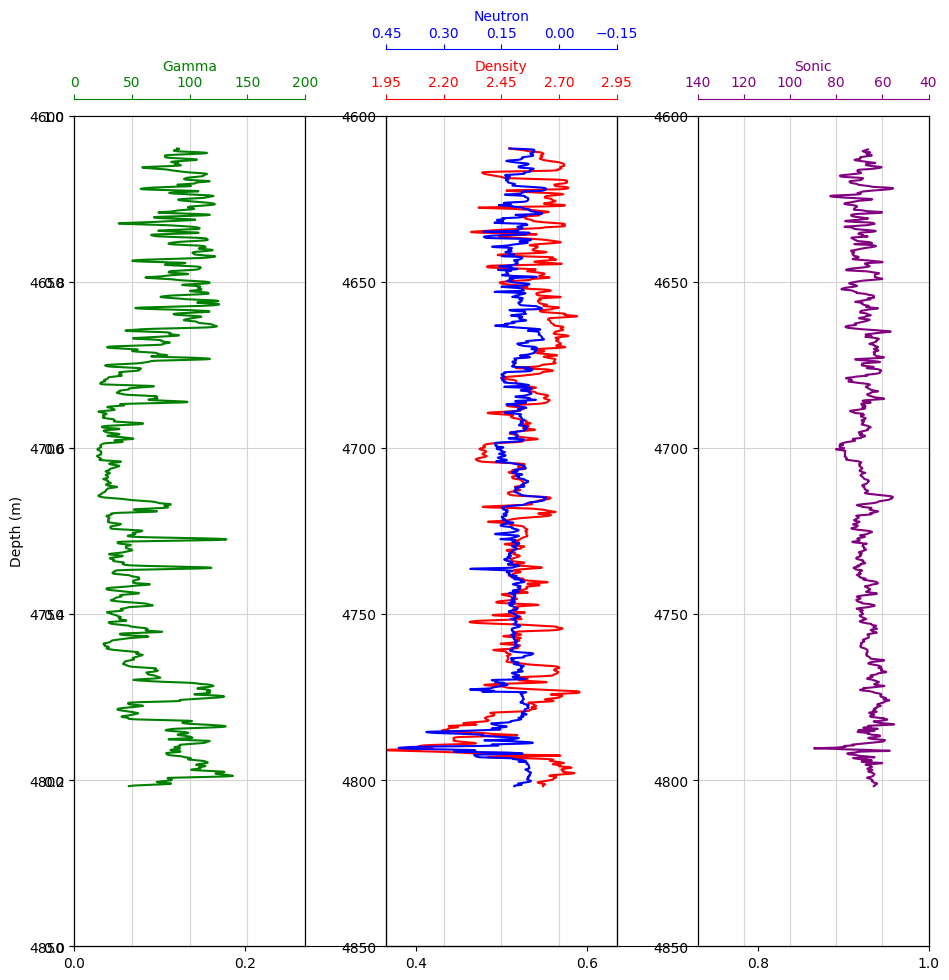

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Density track
ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim(1.95, 2.95)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])

# Sonic track
ax3.plot("DT", "DEPTH", data = well, color = "purple")
ax3.set_xlabel("Sonic")
ax3.set_xlim(140, 40)
ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = well, color = "blue")
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(0.45, -0.15)
ax4.set_ylim(4850, 4600)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.45, 0.3, 0.15,0, -0.15])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(4850, 4600)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()